In [2]:
#Import data file
import pandas as pd
data = pd.read_csv("mutations.csv")
data.rename(columns={"Unnamed: 0": "Individual"}, inplace=True)
#data

In [3]:
#Calculate totals for each row and column and load it into a dataframe
#Summing up the rows, keeping the individual labels in column 1
num_mut_per_ind = data.sum(1)
df1 = num_mut_per_ind.to_frame()
df1.insert(0, "Individual", data['Individual'])
df1.rename(columns={0 : "Total Mutations"}, inplace=True)
#Summing up the columns, keeping the mutations in column 1
num_ind_per_mut = data.sum()
df2 = num_ind_per_mut.to_frame()
df2.reset_index(inplace=True)
df2.index -= 1
df2.rename(columns={"index": "Mutation", 0 : "Total Individuals"}, inplace=True)
df2 = df2[1:1411]
#df1
#df2

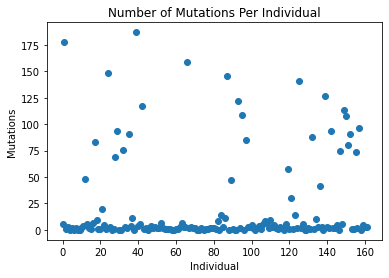

In [4]:
#Plot number of mutations per individual
import matplotlib.pyplot as plt
plt.scatter(df1.index, df1.loc[:,"Total Mutations"])
plt.title("Number of Mutations Per Individual")
plt.xlabel("Individual")
plt.ylabel("Mutations")
plt.show()

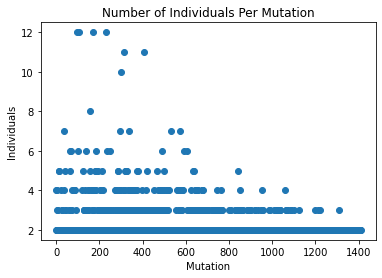

In [5]:
#Plot number of individuals per mutation
plt.scatter(df2.index, df2.loc[:,"Total Individuals"])
plt.title("Number of Individuals Per Mutation")
plt.xlabel("Mutation")
plt.ylabel("Individuals")
plt.show()

In [22]:
#Construct a feature table with additional analysis on the data
feature_table_df = df2.copy()
#First column T = total individuals per mutation is already calculated
feature_table_df.rename(columns={"Mutation" : "Genetic Mutation (Feature)", "Total Individuals" : 'T'}, inplace=True)
# C = number of individuals with cancer with that mutation
feature_table_df['C'] = 0
# NC = number of non-cancer individuals with that mutation
feature_table_df['NC'] = 0
# %C = % of individuals with that mutation with cancer
feature_table_df['%C'] = 0
# %NC = % of individuals with that mutation without cancer
feature_table_df['%NC'] = 0
# %C - %NC = Difference between %C and %NC
feature_table_df['%C - %NC'] = 0
# %C / %NC = Ratio of %C to %NC
feature_table_df['%C / %NC'] = 0
#feature_table_df

In [23]:
#Count up how many individuals with cancer have each mutation
#Axis 0 = vertical axis
for x in range(len(data.axes[0])):
    #Axis 1 = horizontal axis
    for y in range(len(data.axes[1])):
        #Check for mutation and if the individual has cancer
        if data.iloc[x,y] == 1 and data.iloc[x,0][:1] == 'C':
            feature_table_df.loc[y-1,'C'] += 1

#From that information, the rest of the table can be calculated
for y in range(len(feature_table_df.axes[0])):
    feature_table_df.loc[y,'NC'] = feature_table_df.loc[y,'T'] - feature_table_df.loc[y,'C']
    feature_table_df.loc[y,'%C'] = feature_table_df.loc[y,'C'] / feature_table_df.loc[y,'T']
    feature_table_df.loc[y,'%NC'] = feature_table_df.loc[y,'NC'] / feature_table_df.loc[y,'T']
    feature_table_df.loc[y,'%C - %NC'] = feature_table_df.loc[y,'%C'] - feature_table_df.loc[y,'%NC']
    if feature_table_df.loc[y,'%NC'] != 0:
        feature_table_df.loc[y,'%C / %NC'] = feature_table_df.loc[y,'%C'] / feature_table_df.loc[y,'%NC']
    else:
        #Use some small number to avoid dividing by 0
        feature_table_df.loc[y,'%C / %NC'] = feature_table_df.loc[y,'%C'] / 0.000001

#feature_table_df.to_csv("feature_table.csv", index=True)
feature_table_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-...,2.0,2,0.0,1.00,0.00,1.0,1000000.0
1,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,4.0,3,1.0,0.75,0.25,0.5,3.0
2,NHLRC2_GRCh37_10:115662308-115662308_Frame-Shi...,2.0,2,0.0,1.00,0.00,1.0,1000000.0
3,PDZD8_GRCh37_10:119042898-119042898_Frame-Shif...,2.0,2,0.0,1.00,0.00,1.0,1000000.0
4,EBF3_GRCh37_10:131666125-131666125_Frame-Shift...,4.0,4,0.0,1.00,0.00,1.0,1000000.0
...,...,...,...,...,...,...,...,...
1405,MME_GRCh37_3:154866382-154866382_Missense-Muta...,2.0,1,1.0,0.50,0.50,0.0,1.0
1406,CADPS_GRCh37_3:62459960-62459960_Missense-Muta...,2.0,0,2.0,0.00,1.00,-1.0,0.0
1407,SCN4A_GRCh37_17:62049998-62049998_Silent_SNP_G...,2.0,1,1.0,0.50,0.50,0.0,1.0
1408,FPR2_GRCh37_19:52272624-52272624_Missense-Muta...,2.0,0,2.0,0.00,1.00,-1.0,0.0


In [24]:
#Construct a summary feature table, showing the top 10 features (mutations) of each column
#First column, sorted by T
col1_df = pd.DataFrame(feature_table_df.sort_values('T', ascending=False).head(10))
col1_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
172,ACVR2A_GRCh37_2:148683686-148683686_Frame-Shif...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
98,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
106,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,12.0,12,0.0,1.000000,0.000000,1.000000,1000000.0
230,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
313,UBR5_GRCh37_8:103289349-103289349_Frame-Shift-...,11.0,10,1.0,0.909091,0.090909,0.818182,10.0
405,RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del...,11.0,9,2.0,0.818182,0.181818,0.636364,4.5
298,PGM5_GRCh37_9:70993145-70993145_Missense-Mutat...,10.0,10,0.0,1.000000,0.000000,1.000000,1000000.0
157,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del...,8.0,8,0.0,1.000000,0.000000,1.000000,1000000.0
533,KIAA0195_GRCh37_17:73491063-73491063_Frame-Shi...,7.0,7,0.0,1.000000,0.000000,1.000000,1000000.0
339,UPF3A_GRCh37_13:115057211-115057211_Frame-Shif...,7.0,7,0.0,1.000000,0.000000,1.000000,1000000.0


In [25]:
#Second column, sorted by C
col2_df = pd.DataFrame(feature_table_df.sort_values('C', ascending=False).head(10))
col2_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
106,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,12.0,12,0.0,1.000000,0.000000,1.000000,1000000.0
230,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
98,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
172,ACVR2A_GRCh37_2:148683686-148683686_Frame-Shif...,12.0,11,1.0,0.916667,0.083333,0.833333,11.0
298,PGM5_GRCh37_9:70993145-70993145_Missense-Mutat...,10.0,10,0.0,1.000000,0.000000,1.000000,1000000.0
313,UBR5_GRCh37_8:103289349-103289349_Frame-Shift-...,11.0,10,1.0,0.909091,0.090909,0.818182,10.0
405,RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del...,11.0,9,2.0,0.818182,0.181818,0.636364,4.5
157,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del...,8.0,8,0.0,1.000000,0.000000,1.000000,1000000.0
339,UPF3A_GRCh37_13:115057211-115057211_Frame-Shif...,7.0,7,0.0,1.000000,0.000000,1.000000,1000000.0
36,TVP23C_GRCh37_17:15441469-15441469_Intron_SNP_...,7.0,7,0.0,1.000000,0.000000,1.000000,1000000.0


In [26]:
#Third column, sorted by NC
col3_df = pd.DataFrame(feature_table_df.sort_values('NC', ascending=False).head(10))
col3_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
470,SOHLH2_GRCh37_13:36776025-36776025_Missense-Mu...,3.0,0,3.0,0.00,1.00,-1.0,0.000000
372,TP53_GRCh37_17:7578406-7578406_Missense-Mutati...,4.0,1,3.0,0.25,0.75,-0.5,0.333333
195,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,5.0,2,3.0,0.40,0.60,-0.2,0.666667
188,CNGA4_GRCh37_11:6265440-6265440_Missense-Mutat...,3.0,0,3.0,0.00,1.00,-1.0,0.000000
473,TP53_GRCh37_17:7577094-7577094_Missense-Mutati...,4.0,1,3.0,0.25,0.75,-0.5,0.333333
170,CDH1_GRCh37_16:68844172-68844172_Missense-Muta...,3.0,0,3.0,0.00,1.00,-1.0,0.000000
153,TP53_GRCh37_17:7577120-7577120_Missense-Mutati...,3.0,0,3.0,0.00,1.00,-1.0,0.000000
228,ANGPT1_GRCh37_8:108334272-108334272_Silent_SNP...,2.0,0,2.0,0.00,1.00,-1.0,0.000000
465,TP53_GRCh37_17:7578403-7578403_Missense-Mutati...,5.0,3,2.0,0.60,0.40,0.2,1.500000
779,OR5M3_GRCh37_11:56237885-56237885_Missense-Mut...,2.0,0,2.0,0.00,1.00,-1.0,0.000000


In [27]:
#Fourth column, sorted by %C
col4_df = pd.DataFrame(feature_table_df.sort_values('%C', ascending=False).head(10))
col4_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
856,RP11-252A24.2_GRCh37_16:74372644-74372644_RNA_...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
862,CIC_GRCh37_19:42794441-42794441_Frame-Shift-De...,3.0,3,0.0,1.0,0.0,1.0,1000000.0
861,MED31_GRCh37_17:6547714-6547714_3'UTR_DEL_T-T--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
860,PRR11_GRCh37_17:57247171-57247171_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
859,MAPT_GRCh37_17:44101592-44101592_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
858,SRCIN1_GRCh37_17:36708254-36708254_Frame-Shift...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
857,ADAT1_GRCh37_16:75634035-75634035_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
855,MYO9A_GRCh37_15:72190580-72190580_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
846,WNT1_GRCh37_12:49374348-49374348_Frame-Shift-D...,3.0,3,0.0,1.0,0.0,1.0,1000000.0


In [28]:
#Fifth column, sorted by %NC
col5_df = pd.DataFrame(feature_table_df.sort_values('%NC', ascending=False).head(10))
col5_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
795,IFNA10_GRCh37_9:21206570-21206570_Missense-Mut...,2.0,0,2.0,0.0,1.0,-1.0,0.0
981,ZBBX_GRCh37_3:167068281-167068283_In-Frame-Del...,2.0,0,2.0,0.0,1.0,-1.0,0.0
780,FLG_GRCh37_1:152279828-152279828_Missense-Muta...,2.0,0,2.0,0.0,1.0,-1.0,0.0
781,KNSTRN_GRCh37_15:40675071-40675071_Missense-Mu...,2.0,0,2.0,0.0,1.0,-1.0,0.0
782,IVL_GRCh37_1:152882716-152882716_Missense-Muta...,2.0,0,2.0,0.0,1.0,-1.0,0.0
783,OR2M5_GRCh37_1:248309375-248309375_Missense-Mu...,2.0,0,2.0,0.0,1.0,-1.0,0.0
784,UTS2B_GRCh37_3:190986175-190986175_3'UTR_SNP_T...,2.0,0,2.0,0.0,1.0,-1.0,0.0
786,CSMD1_GRCh37_8:2807839-2807839_Missense-Mutati...,2.0,0,2.0,0.0,1.0,-1.0,0.0
787,IFNA17_GRCh37_9:21227998-21227998_Missense-Mut...,2.0,0,2.0,0.0,1.0,-1.0,0.0
772,NEUROD4_GRCh37_12:55420235-55420235_Silent_SNP...,2.0,0,2.0,0.0,1.0,-1.0,0.0


In [29]:
#Sixth columnm, sorted by %C - %NC
col6_df = pd.DataFrame(feature_table_df.sort_values('%C - %NC', ascending=False).head(10))
col6_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
856,RP11-252A24.2_GRCh37_16:74372644-74372644_RNA_...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
862,CIC_GRCh37_19:42794441-42794441_Frame-Shift-De...,3.0,3,0.0,1.0,0.0,1.0,1000000.0
861,MED31_GRCh37_17:6547714-6547714_3'UTR_DEL_T-T--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
860,PRR11_GRCh37_17:57247171-57247171_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
859,MAPT_GRCh37_17:44101592-44101592_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
858,SRCIN1_GRCh37_17:36708254-36708254_Frame-Shift...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
857,ADAT1_GRCh37_16:75634035-75634035_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
855,MYO9A_GRCh37_15:72190580-72190580_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
846,WNT1_GRCh37_12:49374348-49374348_Frame-Shift-D...,3.0,3,0.0,1.0,0.0,1.0,1000000.0


In [30]:
#Seventh column, sorted by %C / %NC
col7_df = pd.DataFrame(feature_table_df.sort_values('%C / %NC', ascending=False).head(10))
col7_df

,Genetic Mutation (Feature),T,C,NC,%C,%NC,%C - %NC,%C / %NC
0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
856,RP11-252A24.2_GRCh37_16:74372644-74372644_RNA_...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
862,CIC_GRCh37_19:42794441-42794441_Frame-Shift-De...,3.0,3,0.0,1.0,0.0,1.0,1000000.0
861,MED31_GRCh37_17:6547714-6547714_3'UTR_DEL_T-T--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
860,PRR11_GRCh37_17:57247171-57247171_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
859,MAPT_GRCh37_17:44101592-44101592_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
858,SRCIN1_GRCh37_17:36708254-36708254_Frame-Shift...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
857,ADAT1_GRCh37_16:75634035-75634035_3'UTR_DEL_A-A--,2.0,2,0.0,1.0,0.0,1.0,1000000.0
855,MYO9A_GRCh37_15:72190580-72190580_Frame-Shift-...,2.0,2,0.0,1.0,0.0,1.0,1000000.0
846,WNT1_GRCh37_12:49374348-49374348_Frame-Shift-D...,3.0,3,0.0,1.0,0.0,1.0,1000000.0
